## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('dataset/Index2018.csv')
df = df_raw.copy()
df

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [3]:
## checking for null values
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


**date column is not in datetime type, to changing its datatype**

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   float64       
 2   dax     6269 non-null   float64       
 3   ftse    6269 non-null   float64       
 4   nikkei  6269 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


In [6]:
df.head()

,date,spx,dax,ftse,nikkei
0,1994-07-01,469.90,2224.95,3445.98,18124.01
1,1994-10-01,475.27,2225.00,3440.58,18443.44
2,1994-11-01,474.13,2228.10,3413.77,18485.25
3,1994-12-01,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [7]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


## Plotting the data

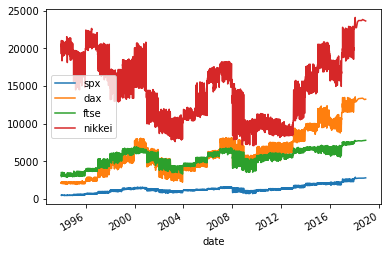

In [8]:
df.plot(y=['spx','dax','ftse','nikkei'],x='date')
plt.show()

<AxesSubplot:title={'center':'S&P500 Prices'}>

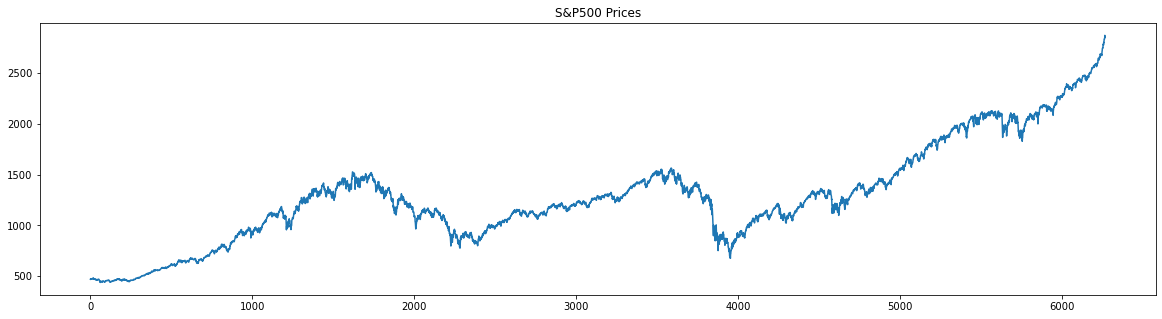

In [9]:
df.spx.plot(figsize=(20,5),title='S&P500 Prices')

<AxesSubplot:title={'center':'FTS100 Prices'}>

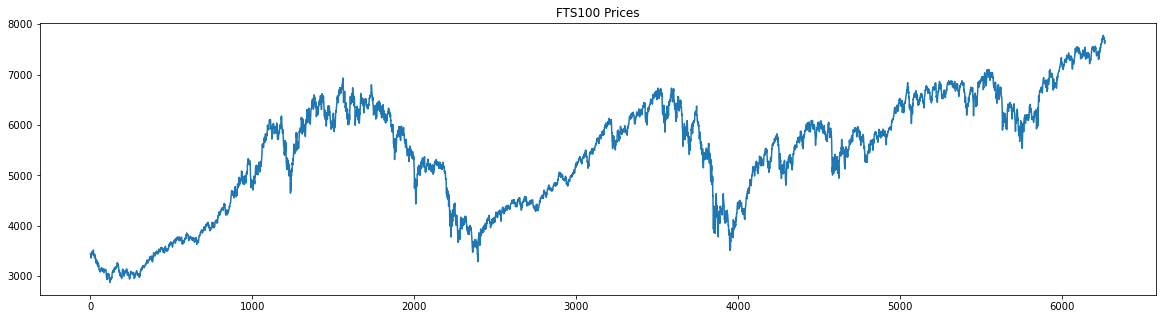

In [10]:
df.ftse.plot(figsize=(20,5),title='FTS100 Prices')

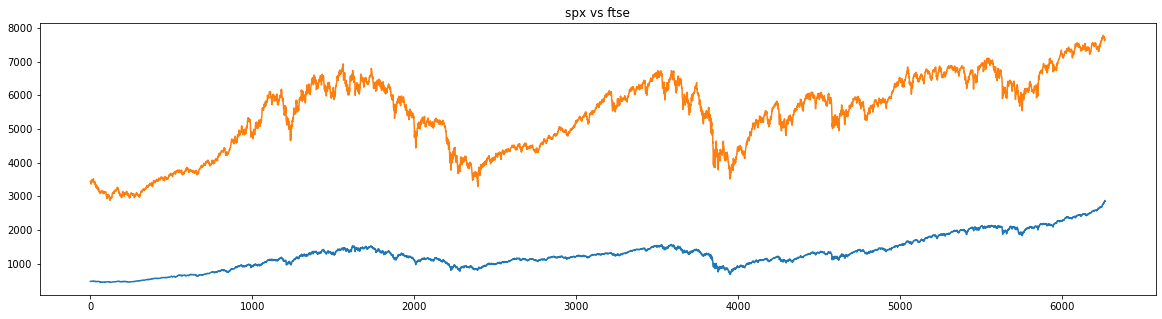

In [11]:
#combining in onne graph:
df.spx.plot(figsize=(20,5),title='S&P500 Prices')
df.ftse.plot(figsize=(20,5),title='FTS100 Prices')
plt.title('spx vs ftse')
plt.show()

## The Quantile-Quantile plot(QQ Plot)

In [12]:
import scipy.stats
import pylab

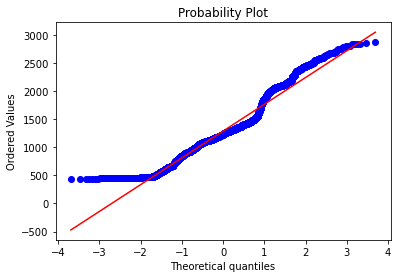

In [13]:
scipy.stats.probplot(df.spx,plot=pylab)
pylab.show()
#redline- what the datapoints should follow, if they are normally distibuted,
#we have more values around 500, so data is not normally distributed.
#x-axis : how many standard deviations away from the mean these values are.
